# EDA - California Housing Dataset

Autor: Gallileu Genesis 

###### Objetivos:
O objetivo da Análise Exploratória de Dados (EDA) é entender a estrutura e os relacionamentos dentro do conjunto de dados e identificar inconsistências, "sujeiras", padrões, outliers e outros recursos de interesse. É uma etapa inicial no processo de análise de dados e é uma etapa crucial antes de aplicar qualquer modelo estatístico ou de aprendizado de máquina aos dados.

Alguns objetivos específicos da EDA incluem:

- Familiarizar-se com os dados e sua estrutura
- Identificando dados ausentes ou incorretos
- Efetuar eventuais correções nos dados
- Detecção de outliers e anomalias
- Entendendo a distribuição de cada variável
- Identificando relações e padrões entre variáveis
- Gerando hipóteses para análise ou modelagem posterior

Em geral, o objetivo da EDA é usar métodos visuais e estatísticos para obter insights sobre os dados e identificar áreas para investigação posterior. É um processo iterativo que permite ao analista refinar e melhorar sua compreensão dos dados à medida que novos insights são obtidos.


## Parte I

O objetivo dessa etapa é realizar uma exploração mais visual, a fim de familiarizar-se com os dados e sua estrutura e identificar dados ausentes, duplicados ou incorretos e, por fim, realizar eventuais correções, se for o caso.

In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

from sklearn.datasets import fetch_california_housing

### Banco de dados

O banco de dados de treinamento possui 17836 amostras (entradas/linhas) e 12 colunas (features/recursos).

In [2]:
# Importar o dataset
data = fetch_california_housing()

# Descrição do banco de dados
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.shape)
df.head()

(20640, 9)


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0    8.33     41.00      6.98       1.02      322.00      2.56     37.88   
1    8.30     21.00      6.24       0.97     2401.00      2.11     37.86   
2    7.26     52.00      8.29       1.07      496.00      2.80     37.85   
3    5.64     52.00      5.82       1.07      558.00      2.55     37.85   
4    3.85     52.00      6.28       1.08      565.00      2.18     37.85   

   Longitude  target  
0    -122.23    4.53  
1    -122.22    3.58  
2    -122.24    3.52  
3    -122.25    3.41  
4    -122.25    3.42

#### Informação de dados ausentes:

Abaixo estão três métodos para analisar a existência de dados ausentes (você só precisa usar um, se quiser). Nenhum dado ausente foi encontrado (tão bom que parece mentira).

In [4]:
# vamos obter um resumo conciso do DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17836 entries, 0 to 17835
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_do_caso                      17836 non-null  object 
 1   continente                      17836 non-null  object 
 2   educacao_do_empregado           17836 non-null  object 
 3   tem_experiencia_de_trabalho     17836 non-null  object 
 4   requer_treinamento_de_trabalho  17836 non-null  object 
 5   num_de_empregados               17836 non-null  int64  
 6   ano_de_estabelecimento          17836 non-null  int64  
 7   regiao_de_emprego               17836 non-null  object 
 8   salario_prevalecente            17836 non-null  float64
 9   unidade_de_salario              17836 non-null  object 
 10  posicao_em_tempo_integral       17836 non-null  object 
 11  status_do_caso                  17836 non-null  object 
dtypes: float64(1), int64(2), object(

Percebemos que a quantidade de valores não nulos é igual ao total de entradas do dataframe, o que indica que não há dados ausentes. Notamos também que os dados numéricos são do tipo float64, int64, o que, junto com os dados do tipo object, ocupam mais de 1.6 MB de memória. 

Você pode otimizar o uso da memória, modificando as propriedades dos tipos de dados.

In [5]:
# O método a seguir mostra de forma mais direta a quantidade de dados ausente em cada coluna
df.isnull().sum()

id_do_caso                        0
continente                        0
educacao_do_empregado             0
tem_experiencia_de_trabalho       0
requer_treinamento_de_trabalho    0
num_de_empregados                 0
ano_de_estabelecimento            0
regiao_de_emprego                 0
salario_prevalecente              0
unidade_de_salario                0
posicao_em_tempo_integral         0
status_do_caso                    0
dtype: int64

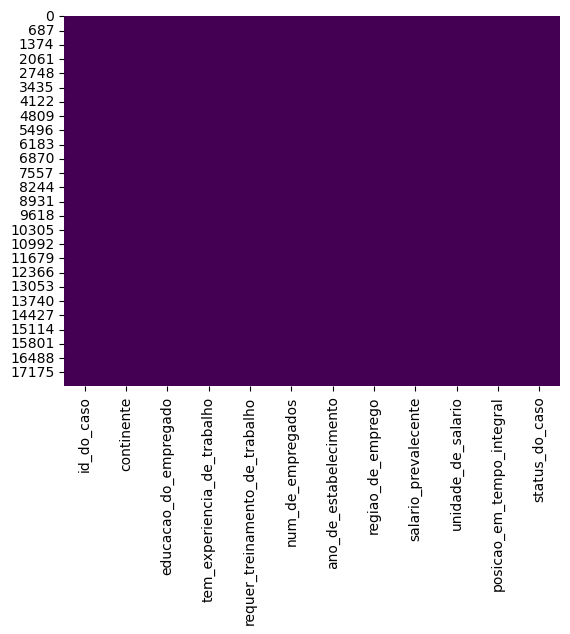

In [6]:
# Podemo visualizar a quantidade de dados ausentes em uma figura do tipo heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

#### Tipos de dados

Vamos atribuir um formato menos custoso aos dados. Basicamente, trocaremos float64 por float32, int64 por int8 e object por category.

In [7]:
float_columns = df.select_dtypes(include='float').columns
print('Colunas float', float_columns.tolist())
int_columns = df.select_dtypes(include='int').columns
print('Colunas int', int_columns.tolist())
object_columns = df.select_dtypes(include='object').columns
print('Colunas object', object_columns.tolist())

Colunas float ['salario_prevalecente']
Colunas int ['num_de_empregados', 'ano_de_estabelecimento']
Colunas object ['id_do_caso', 'continente', 'educacao_do_empregado', 'tem_experiencia_de_trabalho', 'requer_treinamento_de_trabalho', 'regiao_de_emprego', 'unidade_de_salario', 'posicao_em_tempo_integral', 'status_do_caso']


In [8]:
df[float_columns] = df[float_columns].round(2).astype('float32').values
df[int_columns] = df[int_columns].astype('int32') 
df[object_columns] = df[object_columns].astype('category') 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17836 entries, 0 to 17835
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id_do_caso                      17836 non-null  category
 1   continente                      17836 non-null  category
 2   educacao_do_empregado           17836 non-null  category
 3   tem_experiencia_de_trabalho     17836 non-null  category
 4   requer_treinamento_de_trabalho  17836 non-null  category
 5   num_de_empregados               17836 non-null  int32   
 6   ano_de_estabelecimento          17836 non-null  int32   
 7   regiao_de_emprego               17836 non-null  category
 8   salario_prevalecente            17836 non-null  float32 
 9   unidade_de_salario              17836 non-null  category
 10  posicao_em_tempo_integral       17836 non-null  category
 11  status_do_caso                  17836 non-null  category
dtypes: category(9), fl

Temos agora 1.0 MB de memória sendo ocupados pelo dataframe. 

Vamos dar uma olhada em como ficaram os valores. Isso é importante pois esses processos podem levar a perda de informação. Fique antento.

In [10]:
df.head()

id_do_caso continente educacao_do_empregado tem_experiencia_de_trabalho  \
0  EZYV10567     Europa          Ensino Médio                           N   
1   EZYV5505       Ásia              Mestrado                           S   
2   EZYV5207       Ásia          Ensino Médio                           N   
3   EZYV7545       Ásia          Ensino Médio                           N   
4  EZYV16071       Ásia       Ensino Superior                           S   

  requer_treinamento_de_trabalho  num_de_empregados  ano_de_estabelecimento  \
0                              S               2087                    1855   
1                              N               5991                    2003   
2                              N               1426                    2000   
3                              N               3846                    1992   
4                              N               3957                    1949   

  regiao_de_emprego  salario_prevalecente unidade_de_salario  \
0               Sul              69711.24                Ano   
1        Meio-Oeste              52931.38                Ano   
2              Ilha             110830.21                Ano   
3        Meio-Oeste              91884.68             Semana   
4          Nordeste             138155.23                Ano   

  posicao_em_tempo_integral status_do_caso  
0                         S         Negado  
1                         S       Aprovado  
2                         S         Negado  
3                         S         Negado  
4                         S       Aprovado

#### Explorando valores distintos das variáveis

Esse tipo de exploração é útil quando se tem valores com erros de preenchimento, de formato, etc. Serve também para gerar eventuais insights.

In [11]:
for col in df.columns:
    print(100*"-")
    print(f"Variável: {col} | Total: {len(df[col].unique())} | Valores:{df[col].unique()}")

----------------------------------------------------------------------------------------------------
Variável: id_do_caso | Total: 17836 | Valores:['EZYV10567', 'EZYV5505', 'EZYV5207', 'EZYV7545', 'EZYV16071', ..., 'EZYV17821', 'EZYV13200', 'EZYV8903', 'EZYV6163', 'EZYV4219']
Length: 17836
Categories (17836, object): ['EZYV02', 'EZYV05', 'EZYV06', 'EZYV08', ..., 'EZYV9994', 'EZYV9995', 'EZYV9996', 'EZYV9999']
----------------------------------------------------------------------------------------------------
Variável: continente | Total: 6 | Valores:['Europa', 'Ásia', 'América do Sul', 'América do Norte', 'África', 'Oceania']
Categories (6, object): ['América do Norte', 'América do Sul', 'Europa', 'Oceania', 'África', 'Ásia']
----------------------------------------------------------------------------------------------------
Variável: educacao_do_empregado | Total: 4 | Valores:['Ensino Médio', 'Mestrado', 'Ensino Superior', 'Doutorado']
Categories (4, object): ['Doutorado', 'Ensino Méd

#### Limpeza 

Por enquanto, vamos apenas excluir ids


In [12]:
cols_drop = ['id_do_caso']
df.drop(cols_drop, axis=1, inplace=True)

#### Avaliar dados duplicados

Não temos dados duplicados.

In [13]:
# Linhas inteiramente duplicadas
df_all_duplicated = df[df.duplicated(keep = False)]
print(df_all_duplicated.shape)
df_all_duplicated.head()

(0, 11)


Empty DataFrame
Columns: [continente, educacao_do_empregado, tem_experiencia_de_trabalho, requer_treinamento_de_trabalho, num_de_empregados, ano_de_estabelecimento, regiao_de_emprego, salario_prevalecente, unidade_de_salario, posicao_em_tempo_integral, status_do_caso]
Index: []

#### Ajustar dados de salário

A variável salário possui diferentes unidades (Ano, Mês, Semana, Hora) o que produz uma diferença de escala muito grande entre os valores e pode levar a interpretações equivocadas nas explorações gráficas/estatísticas posteriores. 

Para remediar essa situação e levar em conta o regime de trabalho, é essencial normalizar os salários para uma unidade de medida padronizada. Nesse contexto, a unidade escolhida é o "ano". Além disso, a consideração do regime de trabalho (tempo integral ou meio período) é essencial para a conversão precisa.

A conversão aproximada vai seguir a seguintes regras: 

- Para a unidade "Hora": Se a posição for em tempo integral: Multiplicação por 2080 (levando em consideração uma média de 40 horas por semana e 52 semanas por ano). Se a posição for em meio período: Multiplicação por 1040 (metade das horas de tempo integral).
- Para a unidade "Semana": Se a posição for em tempo integral: Multiplicação por 52. Se a posição for em meio período: Multiplicação por 26 (metade das semanas de tempo integral).
- Para a unidade "Mês": Se a posição for em tempo integral: Multiplicação por 12. Se a posição for em meio período: Multiplicação por 6 (metade dos meses de tempo integral).

**Nota:** É importante ter em mente que essa padronização pode não condizer com a realidade para diversas entradas, que sofrem impactos, por exemplo, do ano da contratação, cujas condições e leis de trabalho podem variar muito entre si.

In [14]:
# Função para converter unidades para Ano
def convert_to_year(row):
    if row['unidade_de_salario'] == 'Hora':
        if row['posicao_em_tempo_integral'] == 'S':
            return row['salario_prevalecente'] * 2080
        else:
            return row['salario_prevalecente'] * 2080 * 0.5   
    elif row['unidade_de_salario'] == 'Semana':
        if row['posicao_em_tempo_integral'] == 'S':
            return row['salario_prevalecente'] * 52
        else:
            return row['salario_prevalecente'] * 52 * 0.5   
    elif row['unidade_de_salario'] == 'Mês':
        if row['posicao_em_tempo_integral'] == 'S':
            return row['salario_prevalecente'] * 12
        else:
            return row['salario_prevalecente'] * 12 * 0.5   
    else:
        return row['salario_prevalecente']


In [15]:
# Aplicar a função usando map
df['salario_anual'] = df.apply(convert_to_year, axis=1)
df.head()

continente educacao_do_empregado tem_experiencia_de_trabalho  \
0     Europa          Ensino Médio                           N   
1       Ásia              Mestrado                           S   
2       Ásia          Ensino Médio                           N   
3       Ásia          Ensino Médio                           N   
4       Ásia       Ensino Superior                           S   

  requer_treinamento_de_trabalho  num_de_empregados  ano_de_estabelecimento  \
0                              S               2087                    1855   
1                              N               5991                    2003   
2                              N               1426                    2000   
3                              N               3846                    1992   
4                              N               3957                    1949   

  regiao_de_emprego  salario_prevalecente unidade_de_salario  \
0               Sul              69711.24                Ano   
1        Meio-Oeste              52931.38                Ano   
2              Ilha             110830.21                Ano   
3        Meio-Oeste              91884.68             Semana   
4          Nordeste             138155.23                Ano   

  posicao_em_tempo_integral status_do_caso  salario_anual  
0                         S         Negado       69711.24  
1                         S       Aprovado       52931.38  
2                         S         Negado      110830.21  
3                         S         Negado     4778003.34  
4                         S       Aprovado      138155.23

#### Descrição estatística básica

In [16]:
df.describe()

num_de_empregados  ano_de_estabelecimento  salario_prevalecente  \
count           17836.00                17836.00              17836.00   
mean             5726.50                 1979.49              74327.42   
std             23321.38                   42.10              52795.86   
min               -26.00                 1800.00                  2.14   
25%              1023.00                 1976.00              33892.91   
50%              2117.00                 1997.00              70106.92   
75%              3504.25                 2005.00             107564.71   
max            602069.00                 2016.00             319210.28   

       salario_anual  
count       17836.00  
mean       194848.92  
std        555834.83  
min           115.81  
25%         46681.85  
50%         82462.45  
75%        124635.89  
max      12189130.69

#### Comentários:
**num_de_empregados:** 
- A média do número de empregados é aproximadamente 5726, com um desvio padrão significativamente maior (23321.38), indicando uma grande dispersão nos valores. 
- A empresa com o menor número de empregados possui -26 empregados, o que parece ser um valor inválido ou erro nos dados.
- O percentil 25 (quartil inferior) é de 1023, o percentil 50 (mediana) é de 2117 e o percentil 75 (quartil superior) é 3504,25. Ou seja, a grande maioria das empresas tem menos de 4 mil funcionários.

**ano_de_estabelecimento:** 
- A média do ano de estabelecimento é por volta de 1979, o que sugere que a maioria das empresas no conjunto de dados foi estabelecida em torno desse período. O desvio padrão de 42.10 indica que há uma dispersão razoável nos anos de estabelecimento.
- A empresa mais antiga foi estabelicida em 1800 e a mais nova em 2016, o que mostram um grande range para essa variável. 
 - O percentil 25 (quartil inferior) é 1976, o percentil 50 (mediana) é 1997 e o percentil 75 (quartil superior) é 2005. Isso sugere que a maioria dos estabelecimentos no conjunto de dados foi estabelecida entre 1976 e 2005.

**salario_prevalecente:** 
- O salário prevalecente tem uma média de cerca de 74327.42 e um desvio padrão alto de 52795.86, indicando uma ampla variação nos salários. O menor salário é de 2.14 (provável valor por hora) e o valor maior é de aproximadamente 319.210,28 (provável valor anual). Isso ocorre devido as variações das unidades de salário nessa coluna.  
- O percentil 25 (quartil inferior) é aproximadamente 33892,91, o percentil 50 (mediana) é aproximadamente 70106,91 e o percentil 75 (quartil superior) é aproximadamente 107564,71. Isso indica que a maioria dos salários está abaixo de USS 110000.

**salario_anual:**
- O salário anual tem uma média de 194848.92, porém, o desvio padrão é muito alto (555834.83), indicando uma grande dispersão e potenciais valores extremos. O maior salário anual é 1.218.9130,69, o que parece ser um valor excepcionalmente alto em comparação com os outros valores.
 
**salario_prevalecente vs salario_anual:**
- A média para salario_anual é mais de 2,5x a média do salario_prevalecente (194848.92 vs 74327.42). Isso sugere que a conversão de todos os salários para o salário anual pode ter introduzido valores discrepantes de salários, que estavam mascarados nas diferentes unidades, o que é reforçado pelas diferenças nos valores de desvio padrão. Esses valores podem ou não ser outliers e devem ser analisados com mais cuidado.
- A conversão fez o salário mínimo saltar de 2.14 no "salario_prevalecente" (provalvemente valor por Hora) para 115.81 no "Salário Anual". 
- O valor máximo salta de 319210.28 no Salário Prevalecente para 12189130.69 no Salário Anual.


Com base nas estatísticas, é evidente que há algumas discrepâncias nos dados, como valores negativos no número de empregados e salários muito baixos ou muito altos. É importante investigar esses valores incomuns e considerar a possibilidade de tratamento de dados. visualizações. 


#### Analisar as entradas negativas em num_de_empregados.

Tem-se apenas 29 entradas com essas características. Pode-se simplesmente tomar o valor absoluto dessas entradas para solucionar o problema. 

In [19]:
df_num_de_empregados_neg = df[df['num_de_empregados']<0]
print(df_num_de_empregados_neg.shape)
df_num_de_empregados_neg.head()

(29, 12)


continente educacao_do_empregado tem_experiencia_de_trabalho  \
85         Ásia             Doutorado                           S   
645        Ásia       Ensino Superior                           N   
1449       Ásia       Ensino Superior                           N   
1640     África              Mestrado                           S   
1676       Ásia          Ensino Médio                           S   

     requer_treinamento_de_trabalho  num_de_empregados  \
85                                N                -11   
645                               N                -14   
1449                              S                -11   
1640                              N                -25   
1676                              N                -14   

      ano_de_estabelecimento regiao_de_emprego  salario_prevalecente  \
85                      1984             Oeste              25753.51   
645                     2012             Oeste              29325.85   
1449                    1946          Nordeste             108403.56   
1640                    1977        Meio-Oeste              79150.51   
1676                    1999               Sul              27599.35   

     unidade_de_salario posicao_em_tempo_integral status_do_caso  \
85                  Ano                         S         Negado   
645                 Ano                         S         Negado   
1449                Ano                         S       Aprovado   
1640                Ano                         S       Aprovado   
1676                Ano                         S         Negado   

      salario_anual  
85         25753.51  
645        29325.85  
1449      108403.56  
1640       79150.51  
1676       27599.35

## Parte II

Essa etapa tem, além dos mesmos objetivos da Parte I, apresentar agora uma exploração visual básica das variáveis. 

In [20]:
def plot_categorical(df, limite=1):
    """
    Plota gráficos de barras horizontais para variáveis categóricas com uma porcentagem acima do limite especificado.
    
    Parâmetros:
    df (pd.DataFrame): O DataFrame contendo os dados.
    limite (float): O limite mínimo de porcentagem para exibir a barra horizontal (padrão é 1%).
    
    Retorna:
    None (exibe os gráficos)
    """
    categorical_cols = df.select_dtypes(exclude=[np.number]).columns
    for col in categorical_cols:
        col_percent = 100 * (df[col].value_counts() / df.shape[0])
        if len(col_percent[col_percent > limite]) > 0:
            print(30 * '-', f'{col}', 30 * '-')
            col_percent[col_percent > limite].plot.barh()
            plt.ylabel(col, fontsize=10)
            plt.xlabel('%', fontsize=10)
            plt.yticks(fontsize=10, rotation=0)
            plt.xticks(fontsize=10, rotation=0)
            plt.show()

def plot_numerical(df):
    """
    Plota gráficos de dispersão para variáveis numéricas.
    
    Parâmetros:
    df (pd.DataFrame): O DataFrame contendo os dados.
    
    Retorna:
    None (exibe os gráficos)
    """
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        print(30 * '-', f'{col}', 30 * '-')
        plt.scatter(df[col].index, df[col])
        plt.ylabel(col, fontsize=10)
        plt.yticks(fontsize=10, rotation=0)
        plt.xticks(fontsize=10, rotation=0)
        plt.show()

#### Alguns comentários:

- A maioria absoluta de pedidos vem da Ásia (mais de 60%). Existe um equilíbrio entre os pedidos da América do Norte e Europa e entre os pedidos da África e América do Sul.
- A maioria dos pedidos são de pessoal com ensino superior ou mestrado. Ensino médio representa menos de 15% do total e doutorado menos de 10%.
- Quase 60% dos pedidos tem experiência no trabalho.
- Mais de 80% dos profissionais não necessitam de treinamento.
- A maioria dos pedidos se destinam para a região Nordeste, Sul e Oeste.
- A grande maioria das unidades de salário é o Ano.
- A grande maioria das aplicações são para vagas em tempo integral.
- Por fim, notamos que a variável alvo possui classes desbalanceadas, numa proporção de quase 70:30.

------------------------------ continente ------------------------------


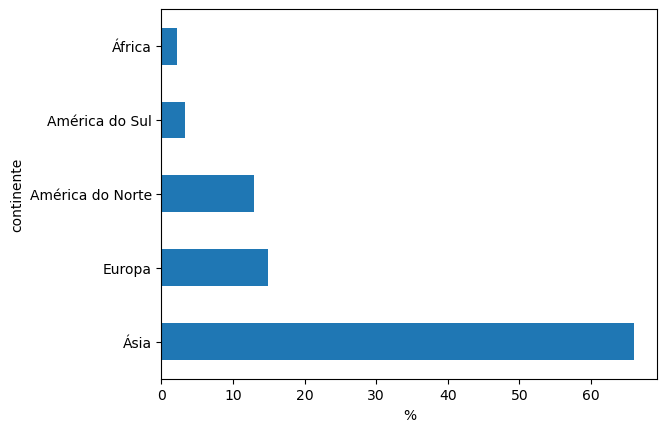

------------------------------ educacao_do_empregado ------------------------------


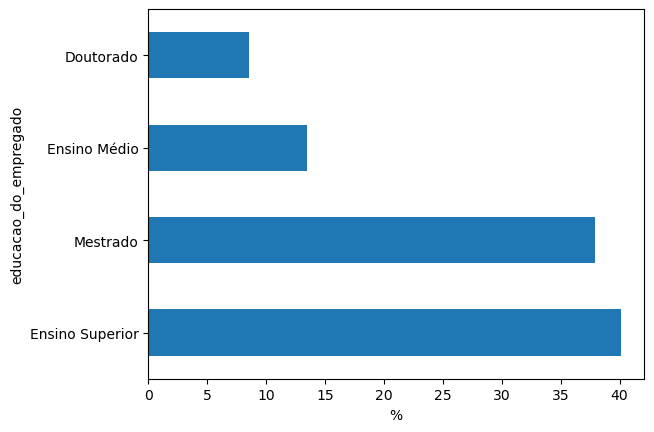

------------------------------ tem_experiencia_de_trabalho ------------------------------


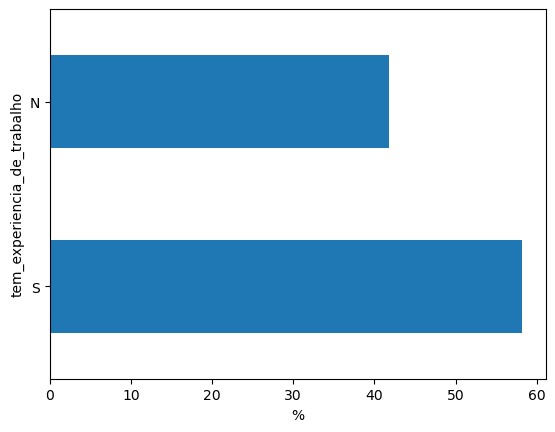

------------------------------ requer_treinamento_de_trabalho ------------------------------


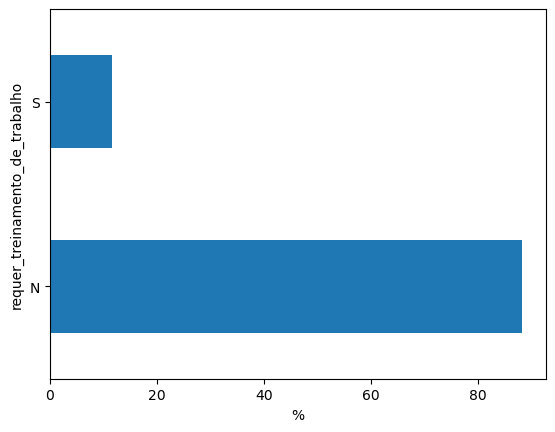

------------------------------ regiao_de_emprego ------------------------------


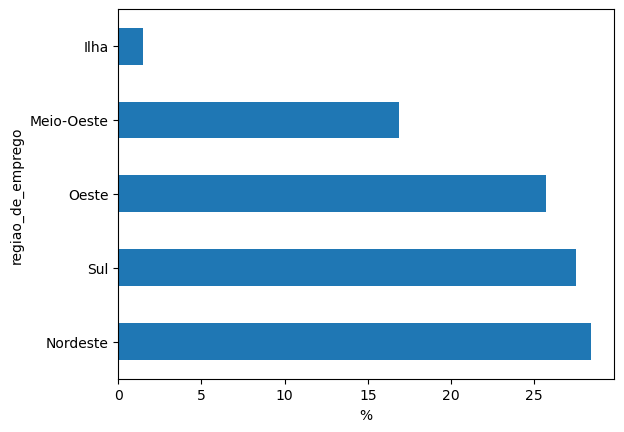

------------------------------ unidade_de_salario ------------------------------


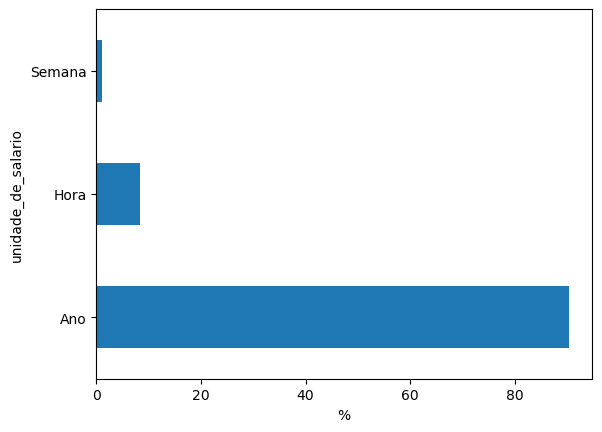

------------------------------ posicao_em_tempo_integral ------------------------------


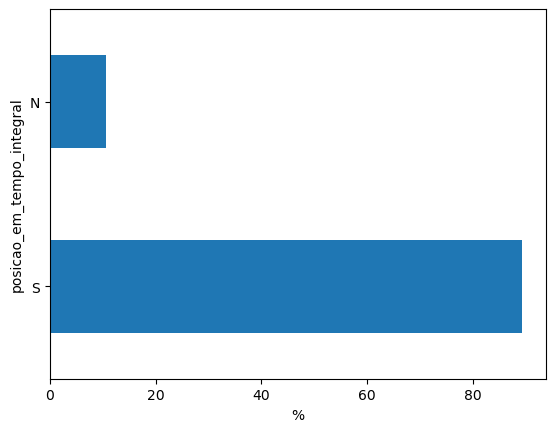

------------------------------ status_do_caso ------------------------------


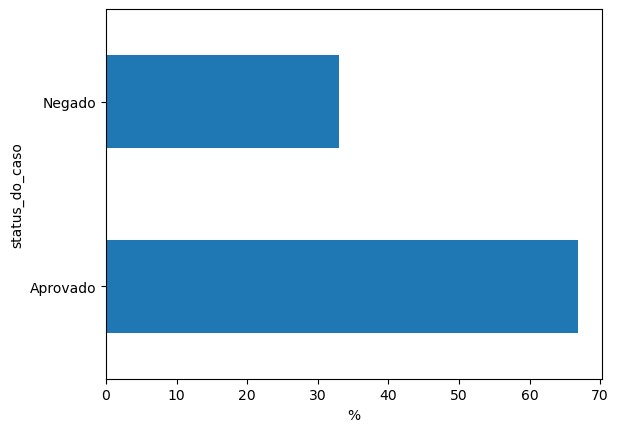

In [21]:
# Plotar valores com proporção limite maior que 1%
plot_categorical(df, limite = 1)

- Grande parte das empresas possui número de empregados de até 5 mil, com uma parcela razoável tendo 50 mil e um número menor com até 150 mil. Valores acima de 200 são raros (seria interessante fazer uma pesquisa se é comum empresas com esse total de empregados nos EUA)
- A grande maioria das empresas foram fundadas após os anos de 1950. No entanto, há uma grande quantidade de empresas estabelecidas desde 1850.
- Os salários predominantes são até 200000. Já os salários anuais possuem bem mais valores discrepantes.

------------------------------ num_de_empregados ------------------------------


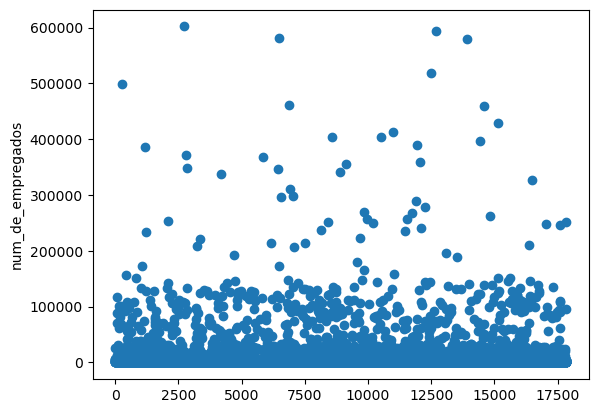

------------------------------ ano_de_estabelecimento ------------------------------


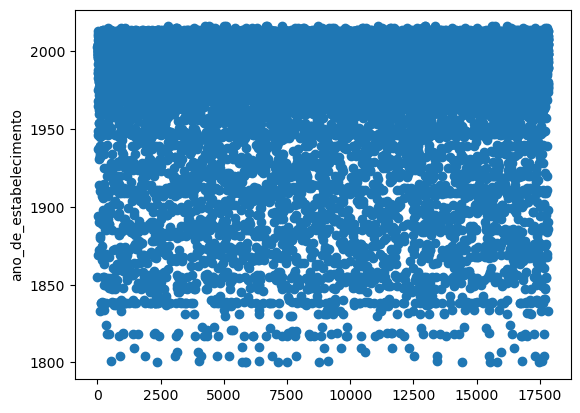

------------------------------ salario_prevalecente ------------------------------


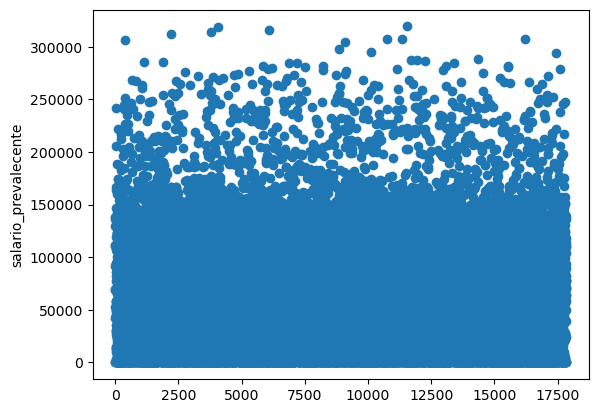

------------------------------ salario_anual ------------------------------


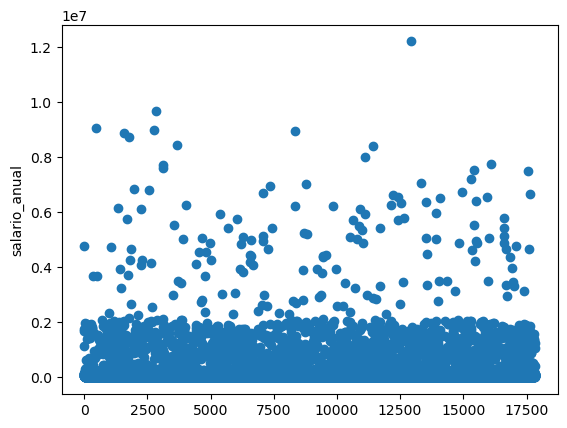

In [22]:
plot_numerical(df)

## Parte III

Vamos, nessa etapa, fazer uma exploração mais aprofundada dos dados, buscando identificar padrões e insight, a partir do interrelacionamento das variáveis e suas distribuições. 


In [23]:
def plot_categorical_features(df, categorical_col, target):
    """
    Plota um gráfico de contagem para variáveis categóricas em relação a uma variável-alvo.
    
    Parâmetros:
    df (pd.DataFrame): O DataFrame contendo os dados.
    categorical_col (str): O nome da coluna categórica a ser plotada.
    target (str): O nome da coluna alvo (geralmente categórica) para distinguir as categorias.
    
    Retorna:
    None (exibe o gráfico)
    """
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=categorical_col, hue=target)
    plt.xticks(rotation=60)

    group_counts = df.groupby(categorical_col)[target].count()
    for p in ax.patches:
        group = int(round(p.get_x()))
        height = p.get_height()
        percentage = f'{(height / group_counts[group]) * 100:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

    plt.show()

def plot_histogram(df, numerical_col, target):
    """
    Plota um histograma com ou sem estimativa de densidade de kernel para variáveis numéricas em relação a uma variável-alvo.
    
    Parâmetros:
    df (pd.DataFrame): O DataFrame contendo os dados.
    numerical_col (str): O nome da coluna numérica a ser plotada.
    target (str): O nome da coluna alvo (geralmente categórica) para distinguir as distribuições.
    
    Retorna:
    None (exibe o gráfico)
    """
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=numerical_col, hue=target, kde=True)
    plt.show()

def plot_boxplot(df, numerical_col='numerical_col', target='target'):
    """
    Plota um gráfico de boxplot para visualizar a distribuição de variáveis numéricas em relação a uma variável-alvo.
    
    Parâmetros:
    df (pd.DataFrame): O DataFrame contendo os dados.
    numerical_col (str): O nome da coluna numérica a ser plotada.
    target (str): O nome da coluna alvo (geralmente categórica) para distinguir as categorias.
    
    Retorna:
    None (exibe o gráfico)
    """
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=target, y=numerical_col)
    plt.show()
    
def plot_violin(df, numerical_col, target):
    """
    Cria um gráfico de violino para visualizar a distribuição de uma variável numérica
    em diferentes categorias de uma variável categórica.

    Parâmetros:
    df (pandas DataFrame): O DataFrame contendo os dados.
    coluna_numerica (str): O nome da coluna numérica para plotar no eixo y.
    alvo (str): O nome da coluna categórica para plotar no eixo x.

    Retorna:
    None
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(8, 4))
    sns.violinplot(x=target, y=numerical_col, data=df)
    plt.show()


def plot_grouped_boxplot(df, categorical_col, numerical_col, target):
    """
    Plota um gráfico de boxplot agrupado para comparar a distribuição de variáveis numéricas entre categorias de uma variável categórica.
    
    Parâmetros:
    df (pd.DataFrame): O DataFrame contendo os dados.
    categorical_feature (str): O nome da coluna categórica usada para agrupar os dados.
    numerical_feature (str): O nome da coluna numérica a ser plotada no eixo y.
    target (str): O nome da coluna alvo (geralmente categórica) para distinguir as categorias dentro de cada grupo categórico.
    
    Retorna:
    None (exibe o gráfico)
    """
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=categorical_col, y=numerical_col, hue=target)
    plt.xticks(rotation=60)
    plt.show()
    
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatterplot(x, y, df, target, log=False, order=False):
    """
    Gera um gráfico de dispersão usando Seaborn.

    Parâmetros:
    x (str ou None): Nome da coluna para o eixo x. Se None, o índice do DataFrame será usado.
    y (str): Nome da coluna para o eixo y.
    df (DataFrame): O DataFrame de entrada contendo os dados.
    target (str): Nome da coluna para a variável de matiz (hue), usada para colorir os pontos.
    log (bool): Se True, usa escala logarítmica para ambos os eixos x e y.
    order (bool): Se True, ordena o DataFrame pela coluna y antes de plotar.

    Retorna:
    None (exibe o gráfico).
    """
    if order:
        df = df.sort_values(by=y)
        df.reset_index(inplace=True, drop=True)

    if x is None:
        x = df.index

    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=x, y=y, data=df, hue=target)
    if log:
        plt.xscale('log')
        plt.yscale('log')
    plt.show()


#### Comentários:
**Continente:**
- Proporção de aprovado/negado: América do Norte (1.6), América do Sul (1.3), Europa (3.8), Oceania (1.9), África (2.5) e Ásia (1.9).
- Essas variações indicam que o continente do candidato parece ser um bom preditor para a variável alvo.

**Educação do empregado:**
- Proporção de aprovado/negado: Doutorado (6.8), Ensino Médio (0.5), Ensino Superior (1.7), Mestrado (3,7).
- Essas variações indicam que a educação do candidato parece ser um bom preditor para a variável alvo.

**Tem experiência de trabalho:**
- Proporção de aprovado/negado: N (1.3), S (3)
- Essas variações indicam que a experiência de trabalho do candidato parece ser um bom preditor para a variável alvo.

**Requer treinamento de trabalho:**
- Proporção de aprovado/negado: N (2), S (2.2)
- Essas variações indicam que a necessidade de treinamento do candidato não parece ser um bom preditor para a variável alvo.

**Região de emprego:**
- Proporção de aprovado/negado: ilha (1.5), Meio-Oeste (3.2), Noroeste (1.7), Oeste (1.6), Sul (2.3)
- Essas variações indicam que a região de emprego do candidato parece ser um bom preditor para a variável alvo.

**Unidade de Salário:** 
- Proporção de aprovado/negado: Ano (2.3), Hora (0.5), Mês (1.3), Semana (1.6).
- Essas variações indicam que a unidade de salário do candidato parece ser um bom preditor para a variável alvo.

**posição em tempo integral:**
- Proporção de aprovado/negado: N (2.2), S (2).
- Essas variações indicam que a posição em tempo integral do candidato não parece ser um bom preditor para a variável alvo.


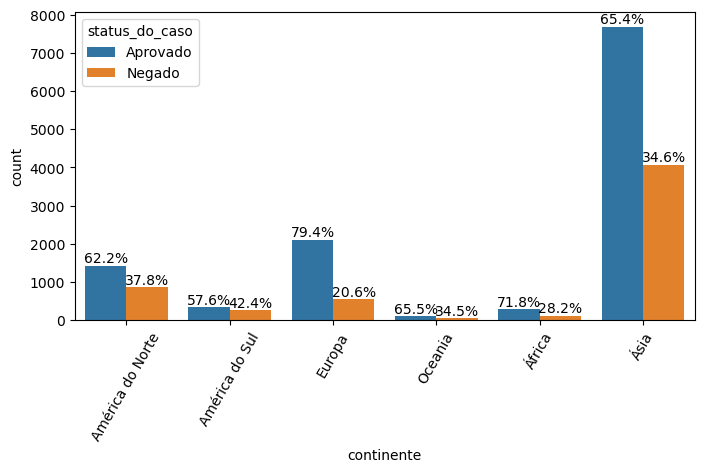

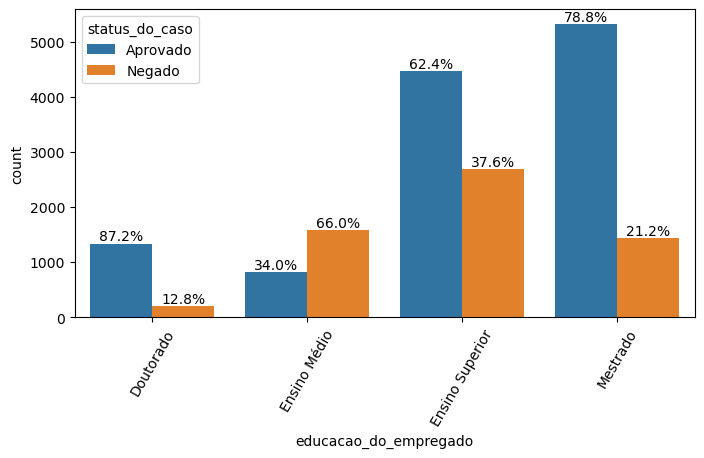

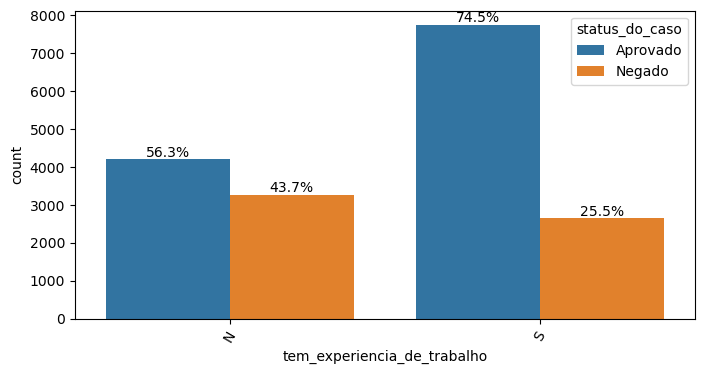

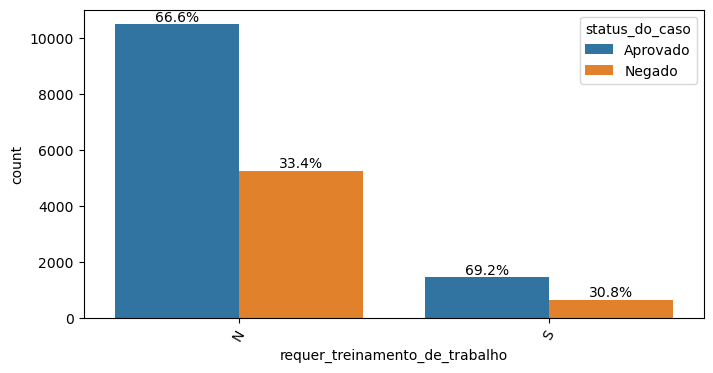

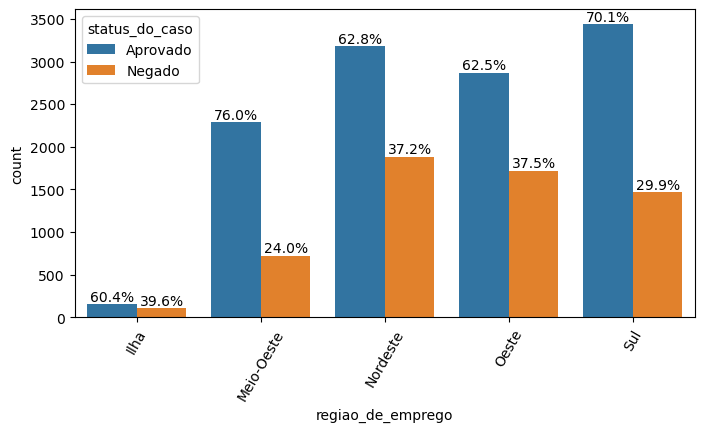

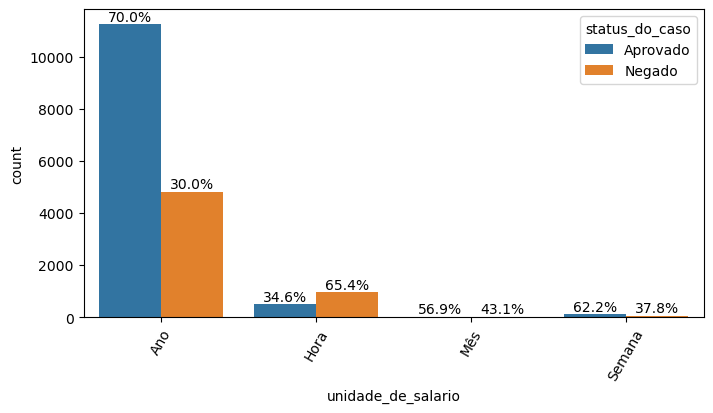

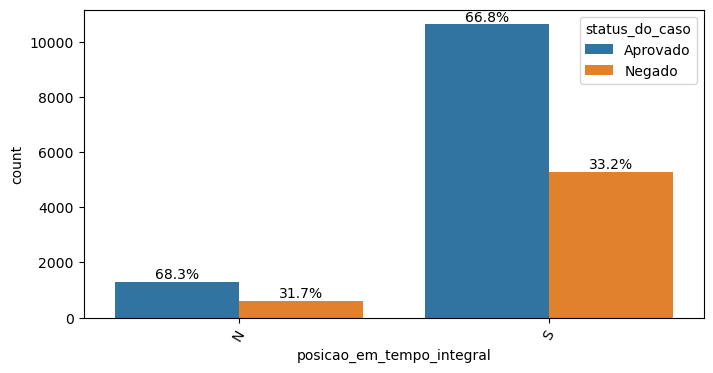

In [24]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_features[0:-1]:
    plot_categorical_features(df, col, 'status_do_caso')

#### Comentários:
De modo geral, todas as variáveis analisadas tem distribuição muito semelhante para ambas as classes, tanto no formato da curva, quanto nas assimetrias. A diferença mais notável está somente nas frequências observadas, fruto do desequilíbrio entre as classes. 

Um outro ponto a se notar é que as distribuições apresentam cauda longa, ou pesada, o que indica que a probabilidade de ocorrência de valores extremos (muito maiores ou muito menores do que a média) é significativamente maior em comparação com distribuições de cauda curta. 

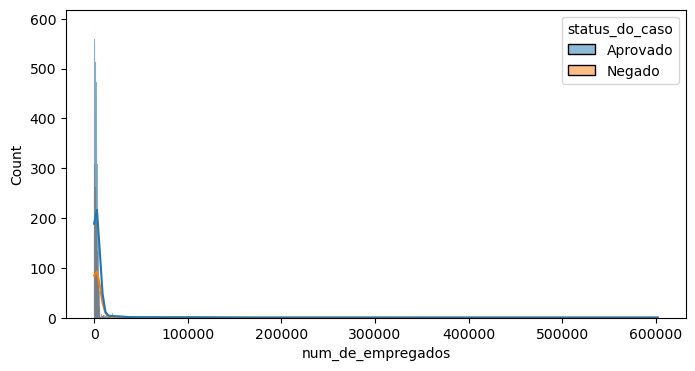

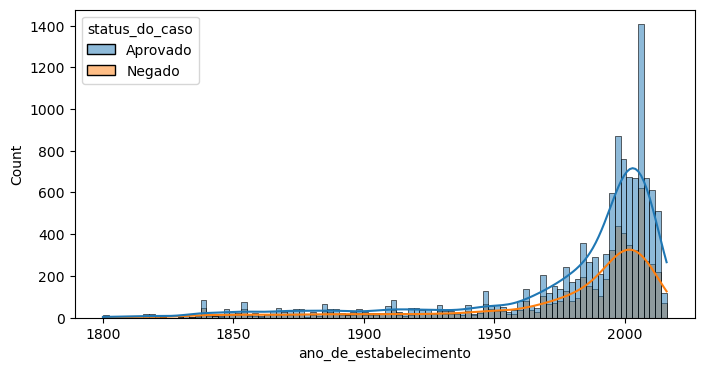

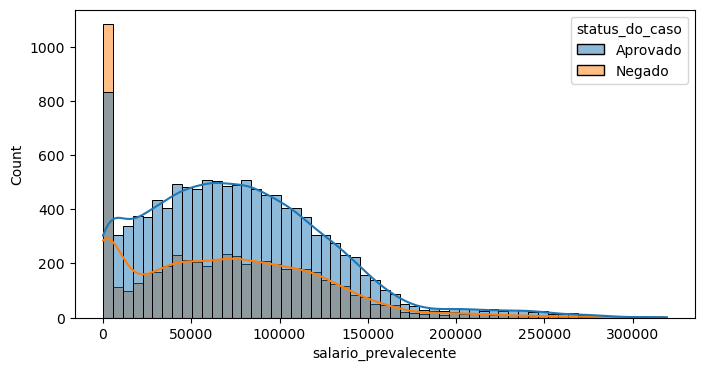

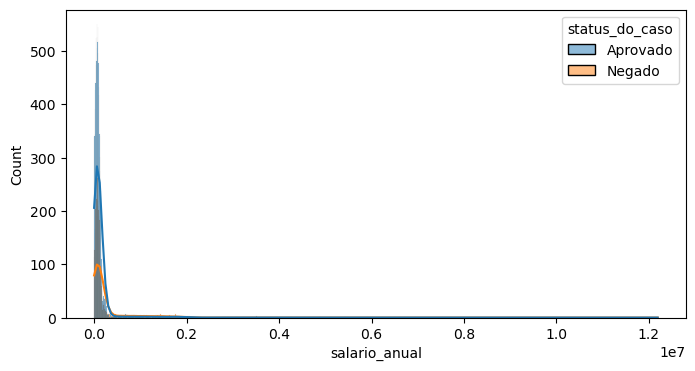

In [25]:
numerical_features = df.select_dtypes(include='number').columns.tolist()
for col in numerical_features:
    plot_histogram(df, col, 'status_do_caso')

**Comentários:**

- A visualização do box-plot para a quantidade de empregados fica prejudicada pela presença de valores muito discrepantes da média. No entanto, a visualização dos dados indica um comporamento bastante semelhante para ambas as classes de interesse. Isso sugere que esse variável, à princípio, não introduz grande "separabilidade" às classes. 
- O mesmo comentário pode ser feito para o ano de estabelicimento.


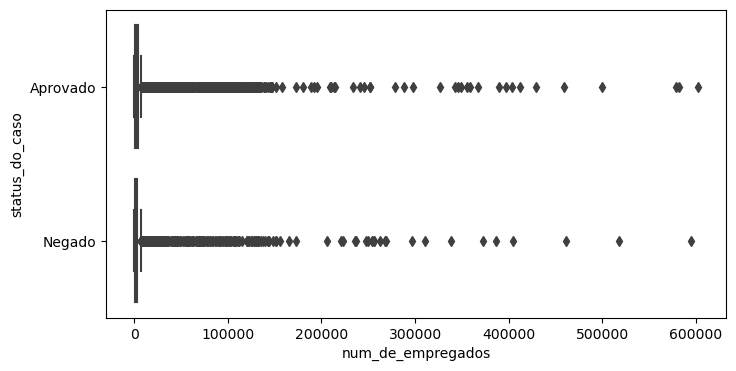

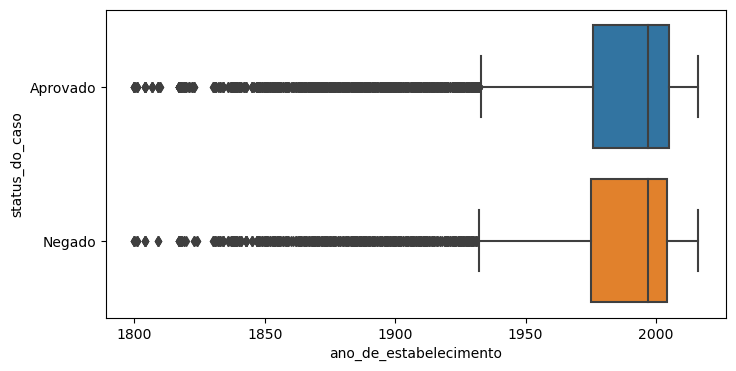

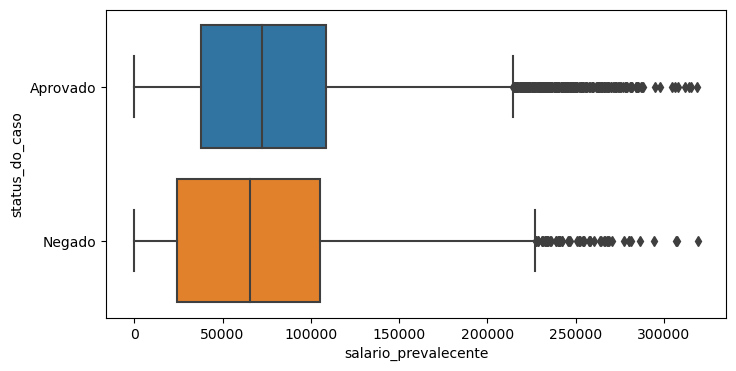

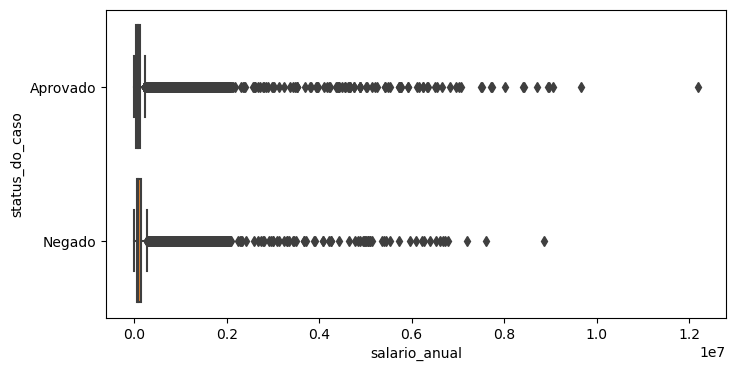

In [26]:
for col in numerical_features:
    plot_boxplot(df, 'status_do_caso', col)

**Comentários:**

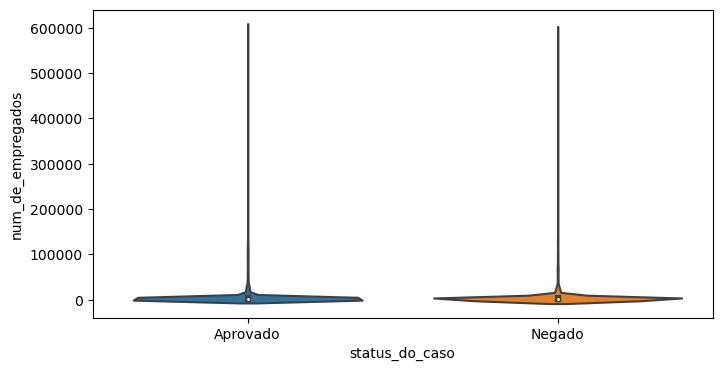

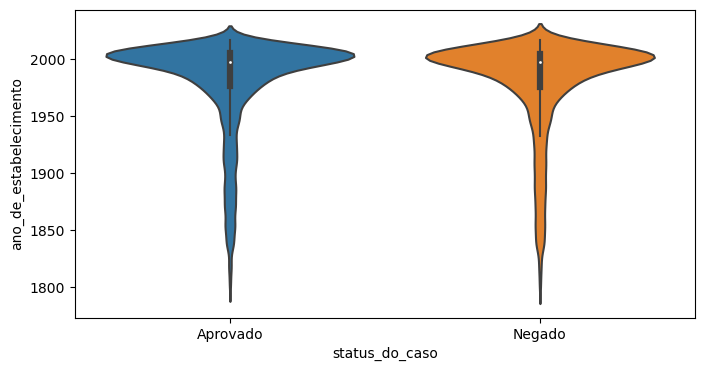

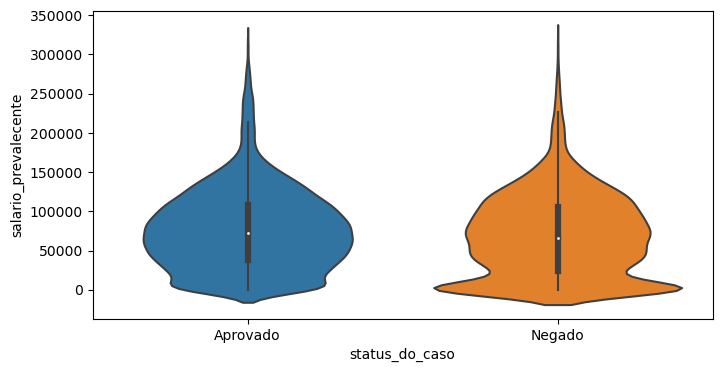

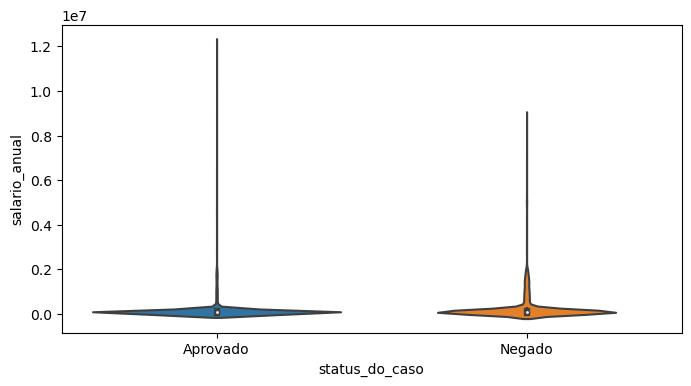

In [27]:
for col in numerical_features:
    plot_violin(df, col, 'status_do_caso')

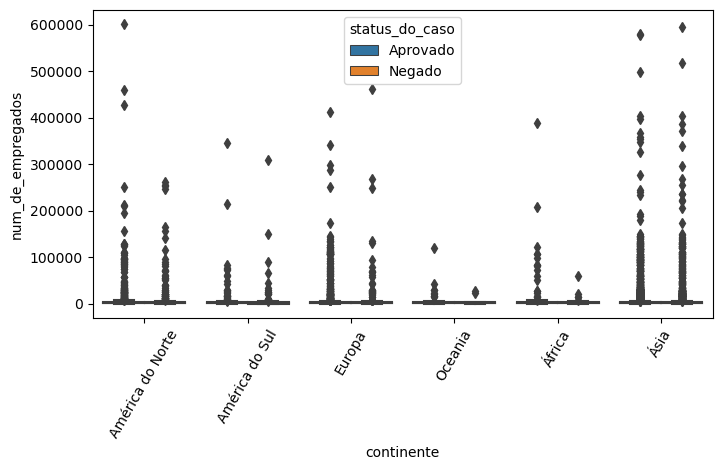

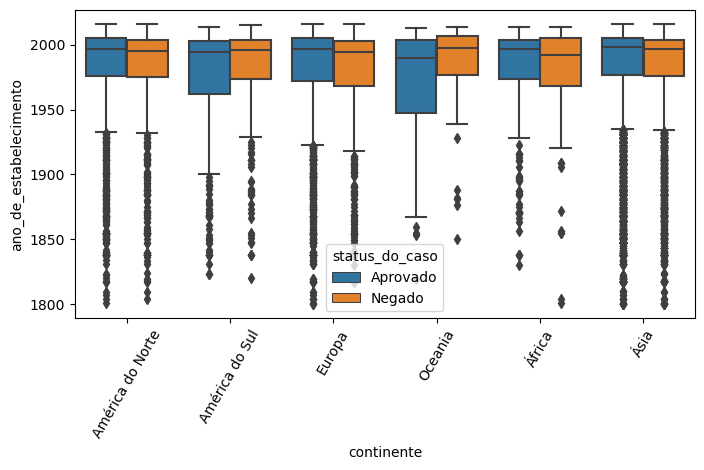

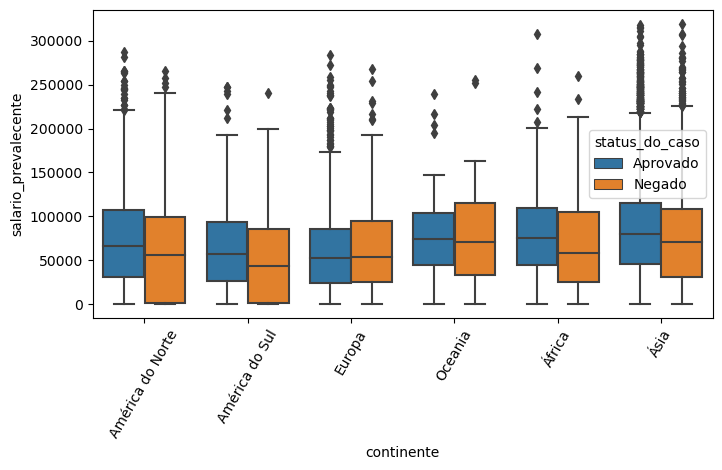

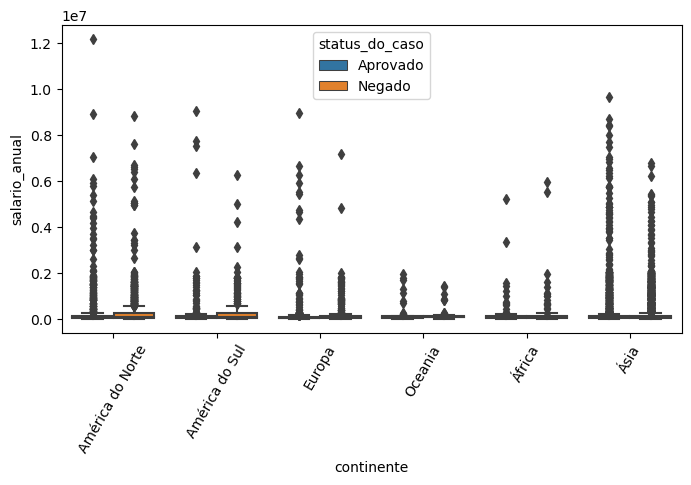

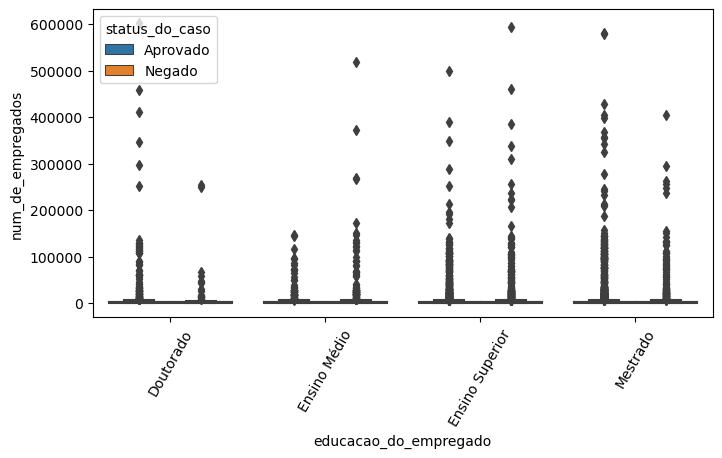

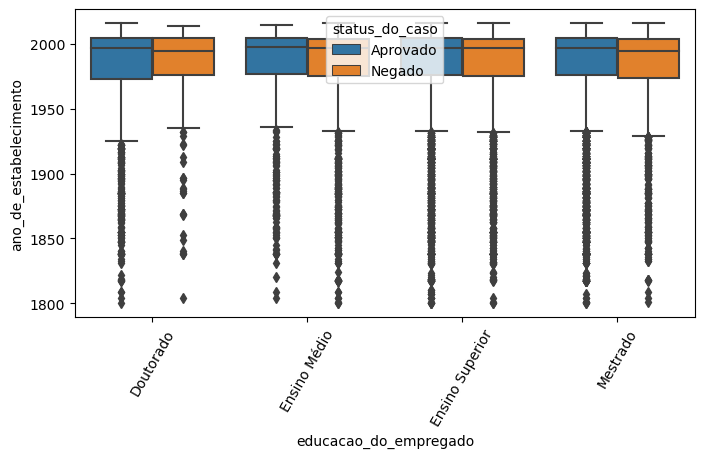

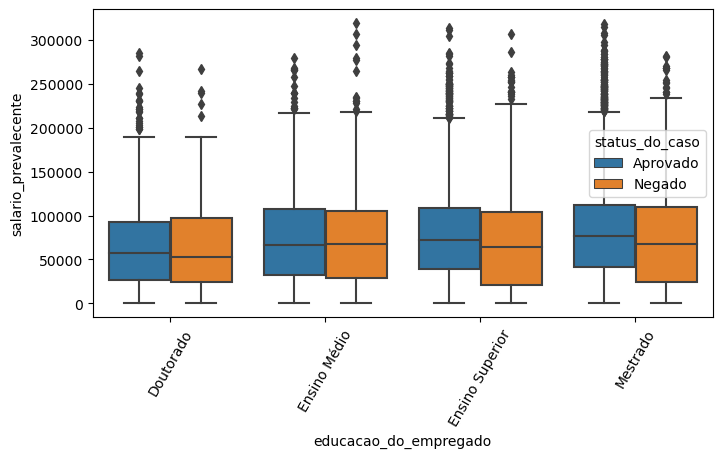

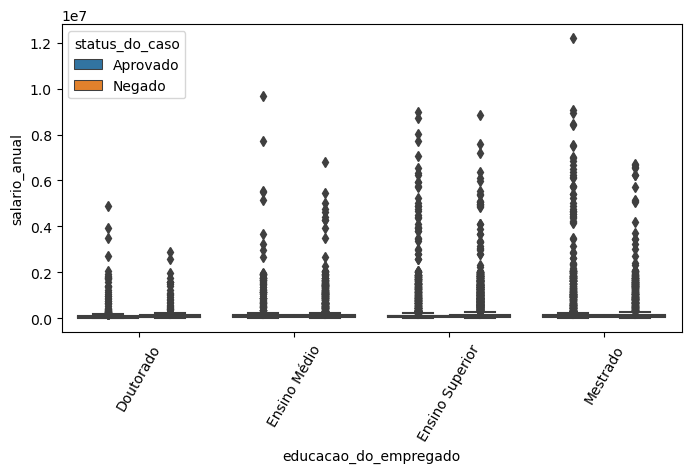

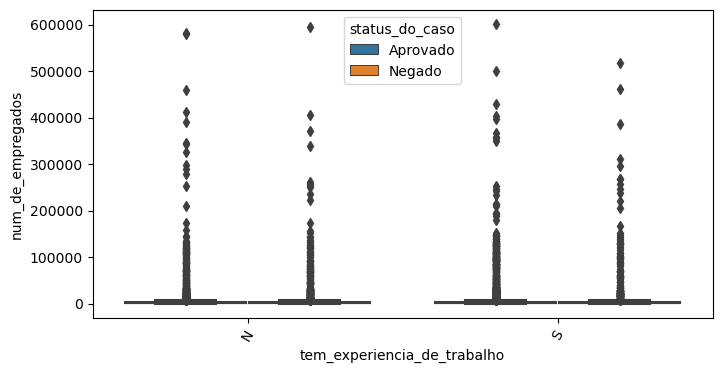

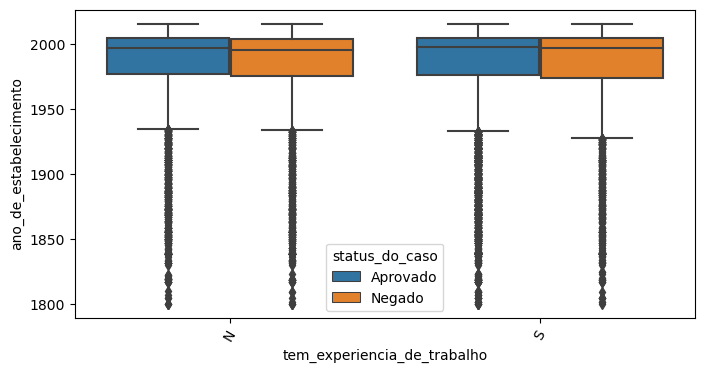

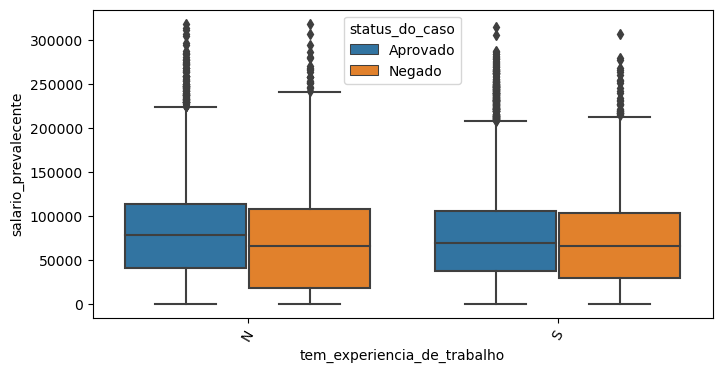

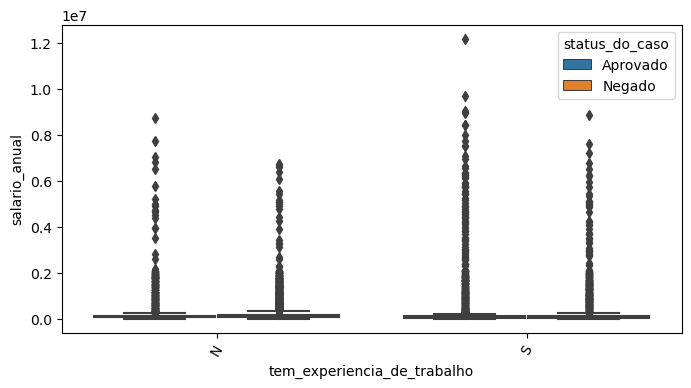

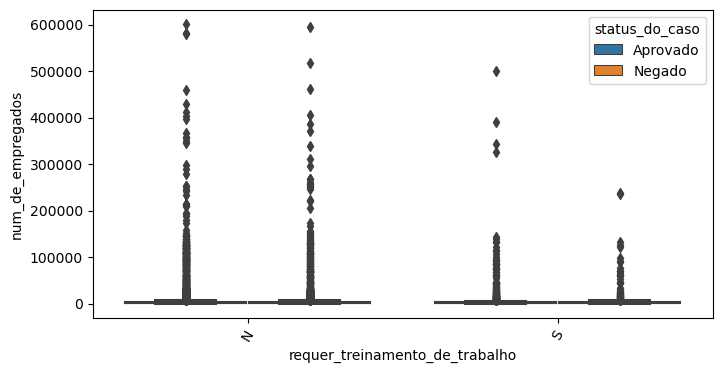

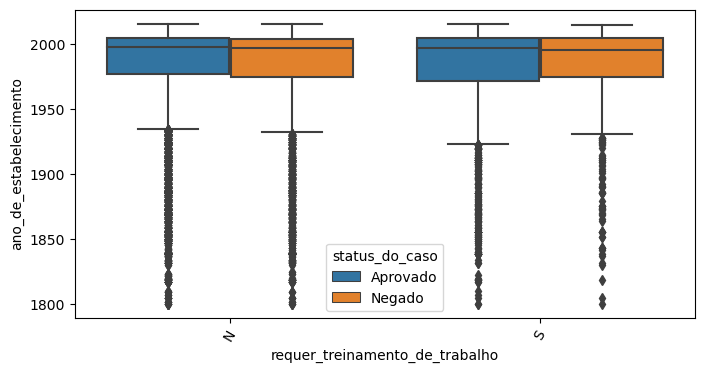

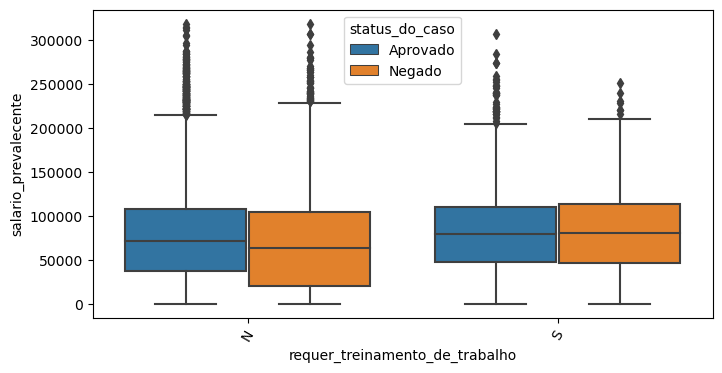

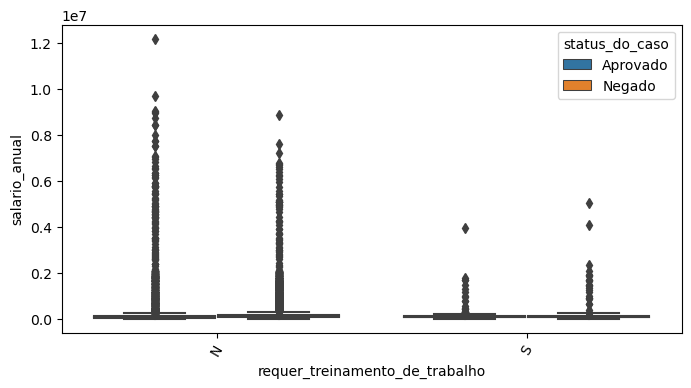

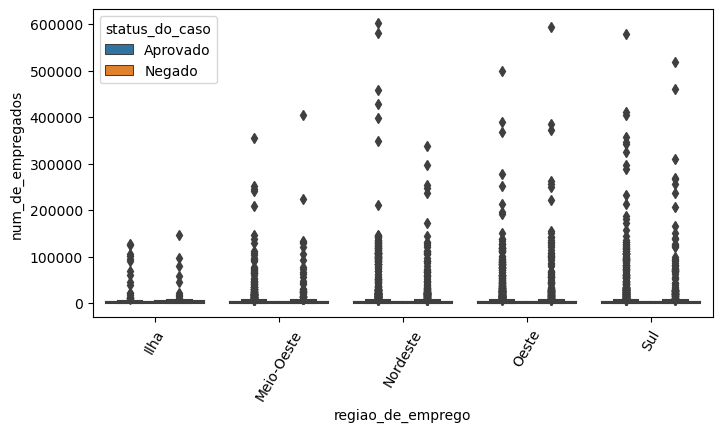

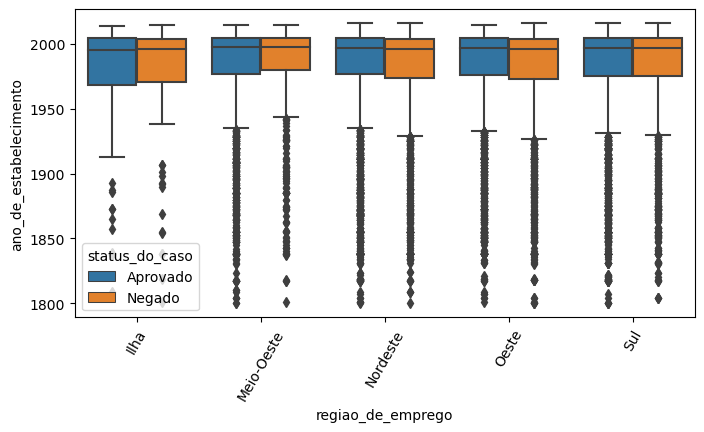

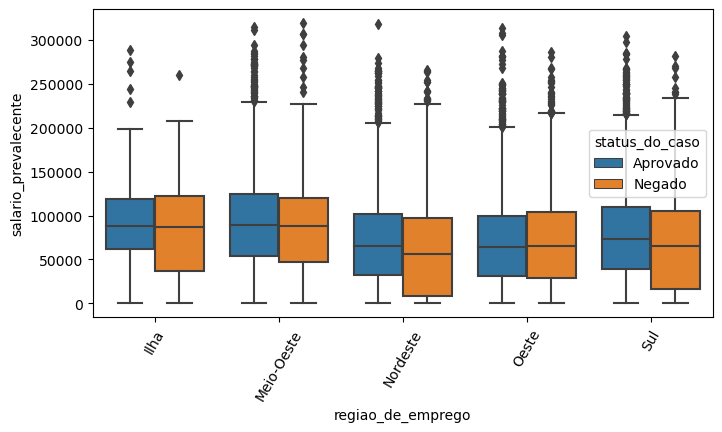

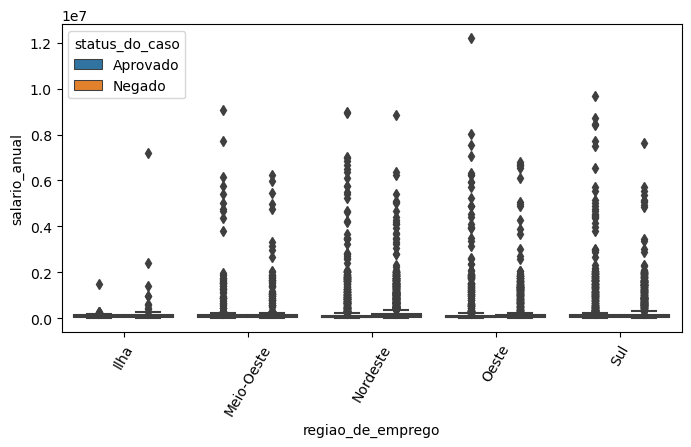

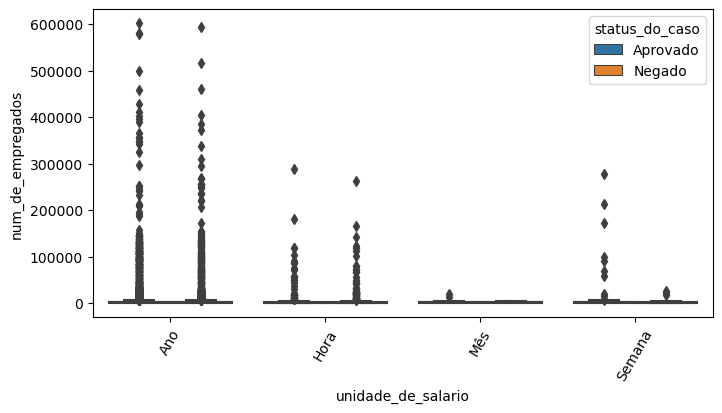

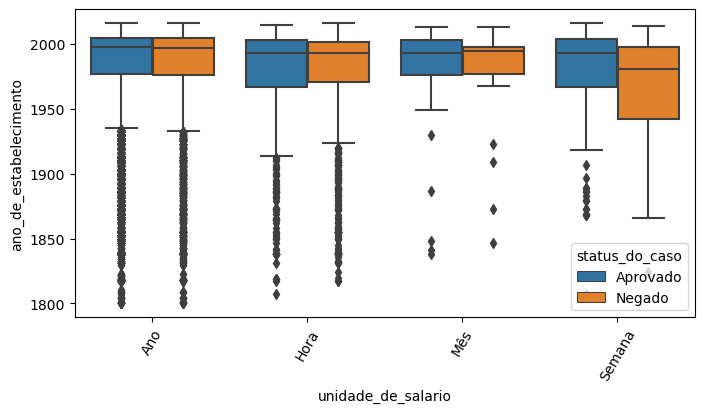

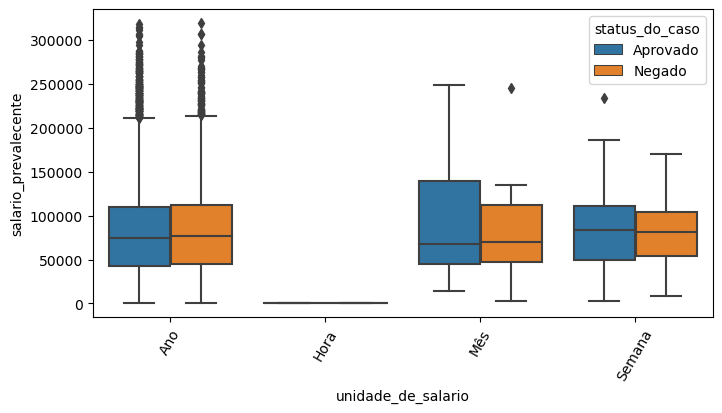

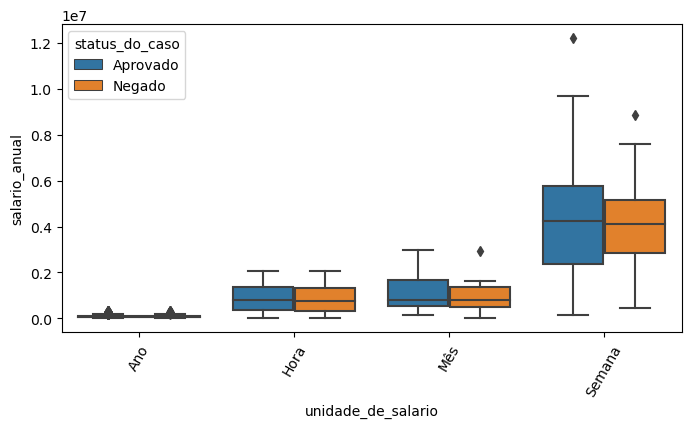

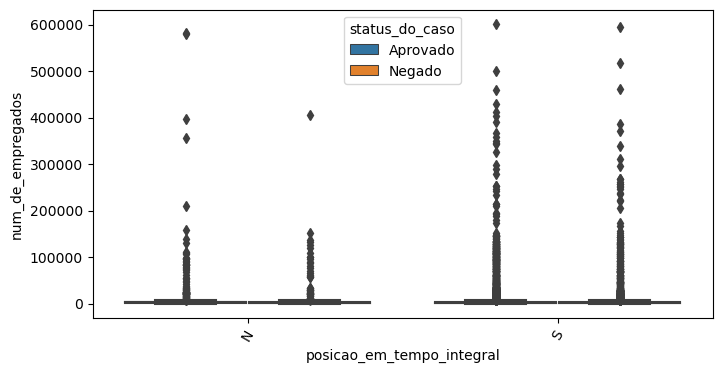

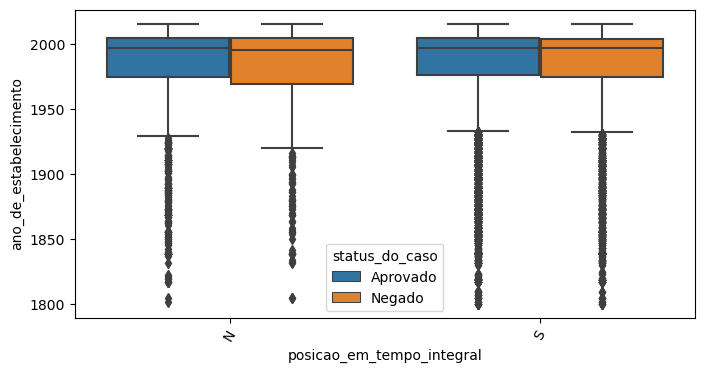

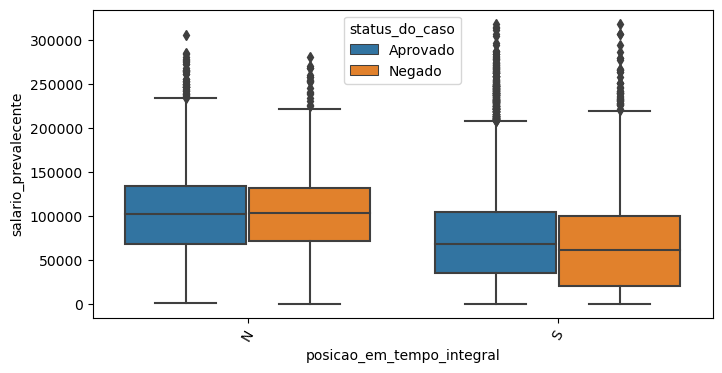

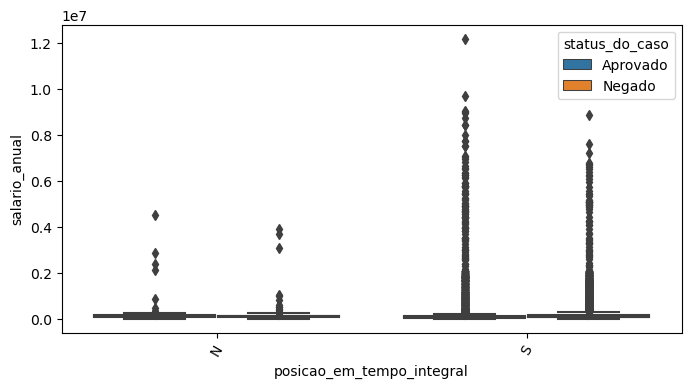

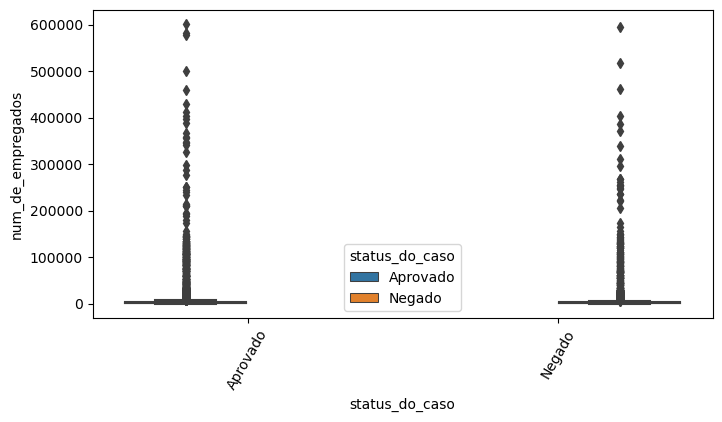

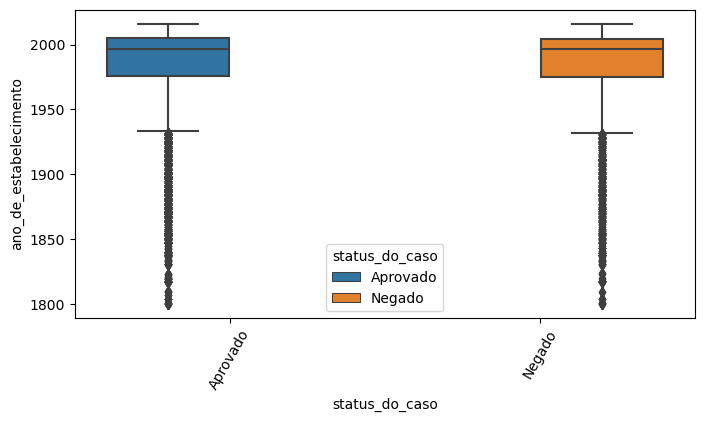

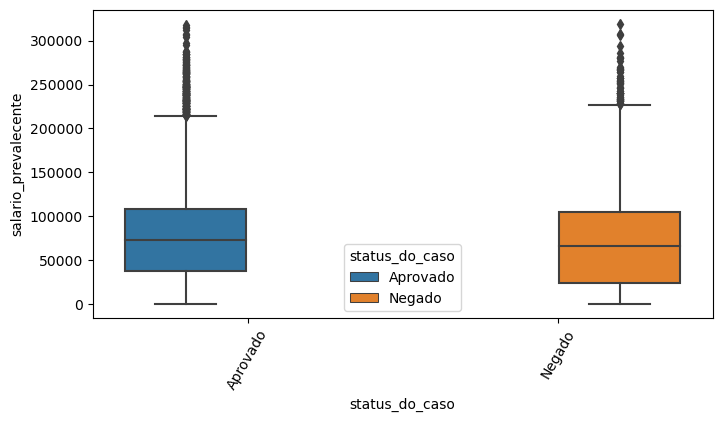

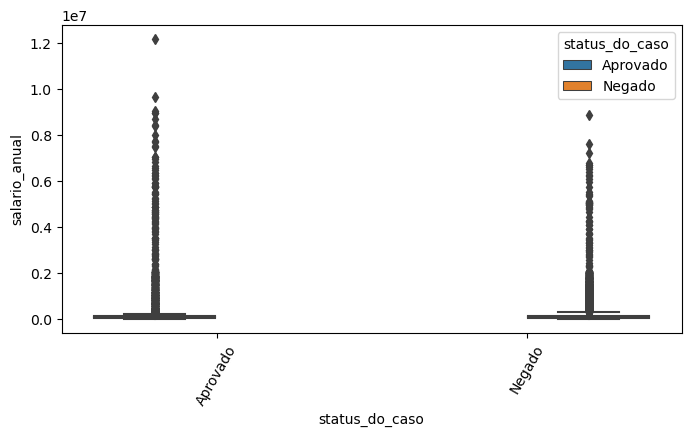

In [28]:
for categorical_col in categorical_features:
    for numerical_col in numerical_features:
        plot_grouped_boxplot(df, categorical_col, numerical_col, 'status_do_caso')

**Comentários:**

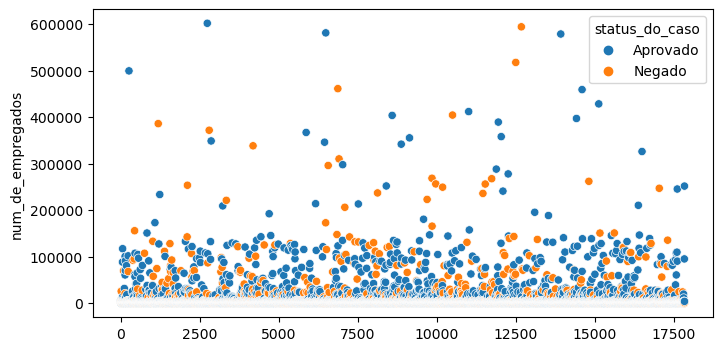

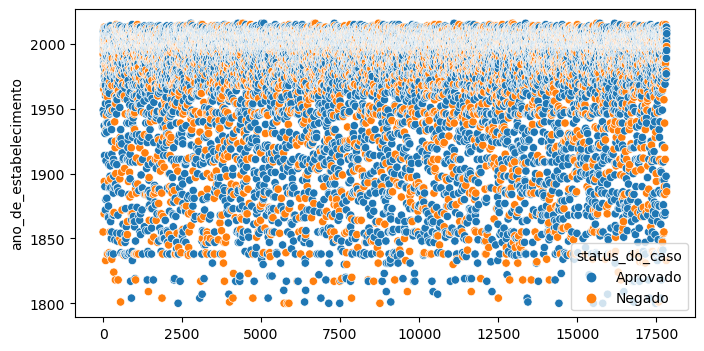

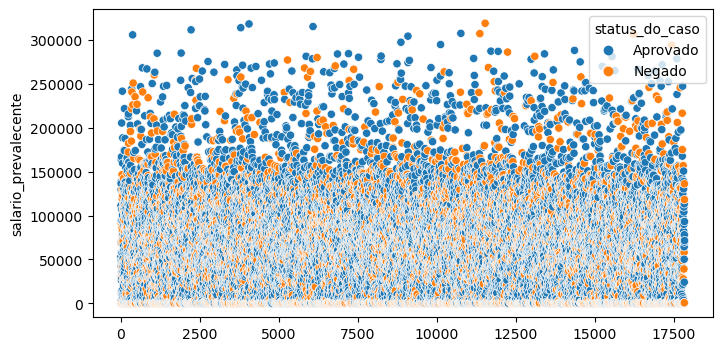

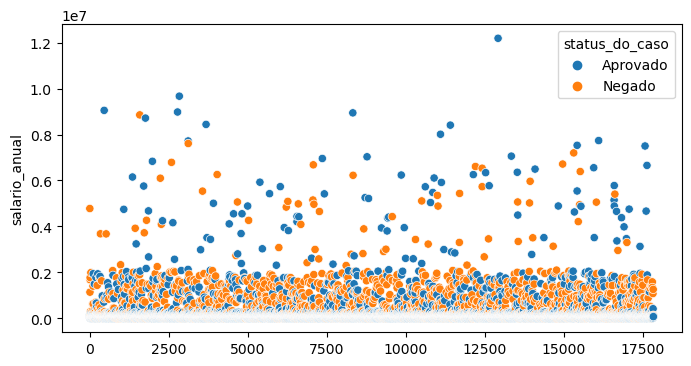

In [29]:
for col in numerical_features:
    plot_scatterplot(x=None, y=col, df=df, target='status_do_caso', log=False, order=False)

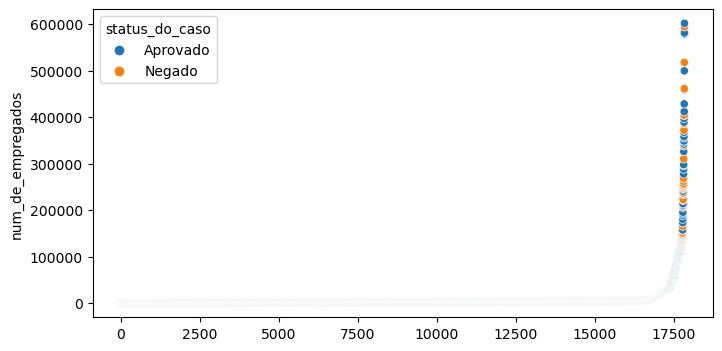

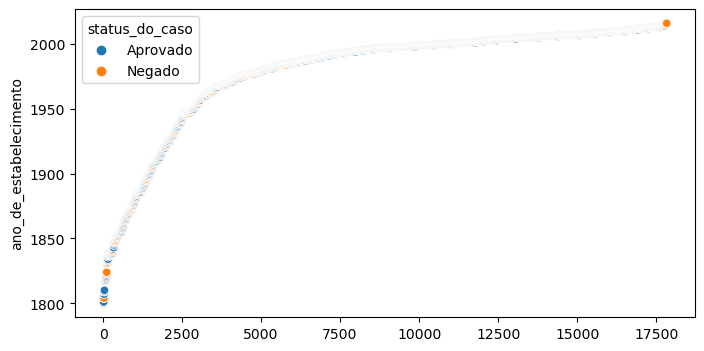

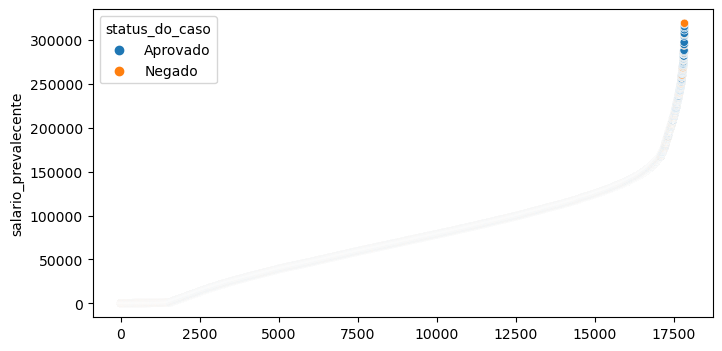

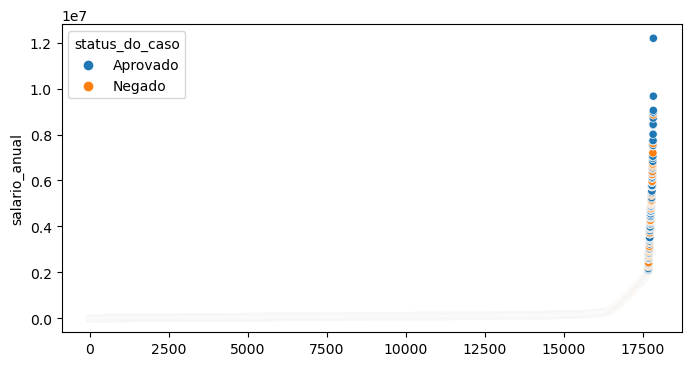

In [30]:
for col in numerical_features:
    plot_scatterplot(x=None, y=col, df=df, target='status_do_caso', log=False, order=True)

<Figure size 1600x400 with 0 Axes>

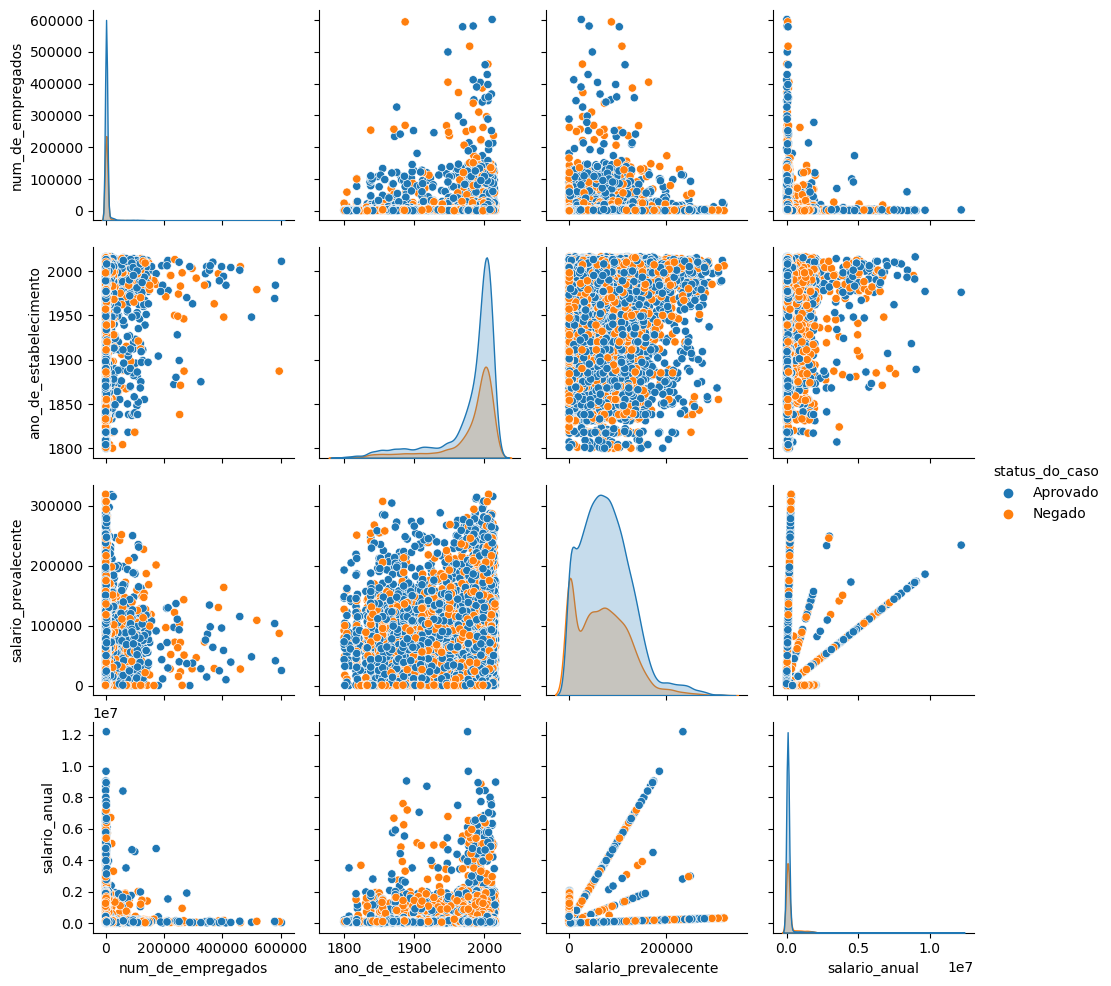

In [31]:
plt.figure(figsize=(16, 4))

sns.pairplot(data=df[numerical_features + ['status_do_caso']], hue='status_do_caso')
plt.show()

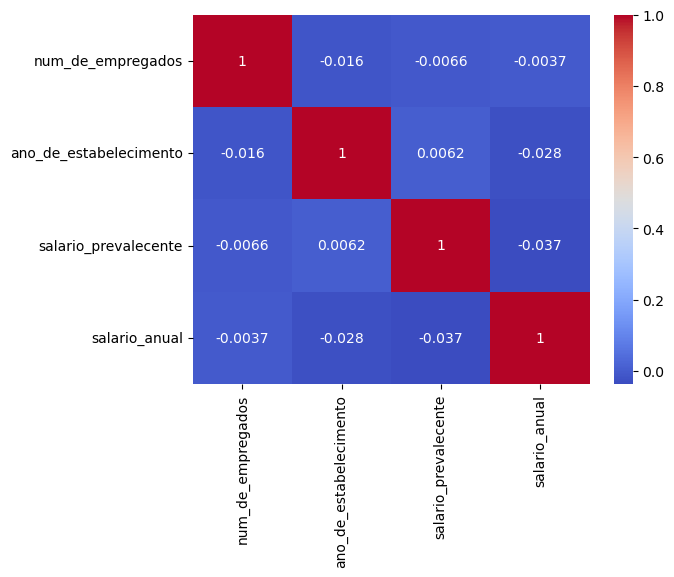

In [32]:
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.show()

**Testes de hipóteses:**
- Para determinar se a diferença na dispersão (variância) é estatisticamente significante, realize uma das seguintes ações:
 - Use um teste para [2 variâncias](https://support.minitab.com/pt-br/minitab/21/help-and-how-to/statistics/basic-statistics/how-to/2-variances/before-you-start/overview/) se você tiver apenas dois grupos.
 - Use um teste de [igualdade de variâncias](https://support.minitab.com/pt-br/minitab/21/help-and-how-to/statistical-modeling/anova/how-to/test-for-equal-variances/before-you-start/overview/) caso tenha três ou mais grupos.